# 콜백을 이용한 자동중단

To Learn
* callback

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
import os

In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
df_pre = pd.read_csv("./dataset/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

In [12]:
dataset = df.values
x = dataset[:,0:12]
y = dataset[:,12]

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, input_dim=12, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
# save_best_only = True => 이전 모델 보다 개선된 경우만 모델 저장
# verbose=1 => 진행사항 출력
# val_loss => 테스트셋 검증 오차
# loss => 학습셋 오차
# val_acc => 테스트셋 정확도
# acc => 학습셋 정확도
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, 
                                                  monitor='val_loss', 
                                                  verbose=1, 
                                                  save_best_only=True)


In [9]:
# 자동 중단 설정
    
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)


* monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
* min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
* patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
* verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
* mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
* auto : 관찰하는 이름에 따라 자동으로 지정합니다.
* min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
* max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다

In [16]:
# 모델을 저장하려면 callbacks를 추가

history = model.fit(x, y, validation_split=0.2, 
                    verbose=0, callbacks=[early_stopping_callback, checkpointer], 
                    epochs=3500, batch_size=500)

W1024 17:34:07.864645 140734781742400 deprecation.py:323] From /Users/woody/XProjects/ML/py3-keras/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 00001: val_loss improved from inf to 0.61261, saving model to ./model/01-0.6126.hdf5

Epoch 00002: val_loss improved from 0.61261 to 0.48876, saving model to ./model/02-0.4888.hdf5

Epoch 00003: val_loss improved from 0.48876 to 0.41909, saving model to ./model/03-0.4191.hdf5

Epoch 00004: val_loss improved from 0.41909 to 0.41251, saving model to ./model/04-0.4125.hdf5

Epoch 00005: val_loss improved from 0.41251 to 0.40554, saving model to ./model/05-0.4055.hdf5

Epoch 00006: val_loss improved from 0.40554 to 0.37804, saving model to ./model/06-0.3780.hdf5

Epoch 00007: val_loss improved from 0.37804 to 0.36128, saving model to ./model/07-0.3613.hdf5

Epoch 00008: val_loss improved from 0.36128 to 0.36014, saving model to ./model/08-0.3601.hdf5

Epoch 00009: val_loss did not improve from 0.36014

Epoch 00010: val_loss improved from 0.36014 to 0.35867, saving model to ./model/10-0.3587.hdf5

Epoch 00011: val_loss improved from 0.35867 to 0.34727, saving model to ./model/11-0.34


Epoch 00110: val_loss did not improve from 0.16314

Epoch 00111: val_loss did not improve from 0.16314

Epoch 00112: val_loss did not improve from 0.16314

Epoch 00113: val_loss did not improve from 0.16314

Epoch 00114: val_loss did not improve from 0.16314

Epoch 00115: val_loss improved from 0.16314 to 0.15966, saving model to ./model/115-0.1597.hdf5

Epoch 00116: val_loss improved from 0.15966 to 0.15803, saving model to ./model/116-0.1580.hdf5

Epoch 00117: val_loss did not improve from 0.15803

Epoch 00118: val_loss did not improve from 0.15803

Epoch 00119: val_loss did not improve from 0.15803

Epoch 00120: val_loss improved from 0.15803 to 0.15659, saving model to ./model/120-0.1566.hdf5

Epoch 00121: val_loss did not improve from 0.15659

Epoch 00122: val_loss did not improve from 0.15659

Epoch 00123: val_loss did not improve from 0.15659

Epoch 00124: val_loss improved from 0.15659 to 0.15491, saving model to ./model/124-0.1549.hdf5

Epoch 00125: val_loss improved from 0.1


Epoch 00253: val_loss improved from 0.11304 to 0.10985, saving model to ./model/253-0.1099.hdf5

Epoch 00254: val_loss did not improve from 0.10985

Epoch 00255: val_loss did not improve from 0.10985

Epoch 00256: val_loss did not improve from 0.10985

Epoch 00257: val_loss did not improve from 0.10985

Epoch 00258: val_loss did not improve from 0.10985

Epoch 00259: val_loss did not improve from 0.10985

Epoch 00260: val_loss did not improve from 0.10985

Epoch 00261: val_loss improved from 0.10985 to 0.10787, saving model to ./model/261-0.1079.hdf5

Epoch 00262: val_loss did not improve from 0.10787

Epoch 00263: val_loss did not improve from 0.10787

Epoch 00264: val_loss improved from 0.10787 to 0.10748, saving model to ./model/264-0.1075.hdf5

Epoch 00265: val_loss did not improve from 0.10748

Epoch 00266: val_loss did not improve from 0.10748

Epoch 00267: val_loss did not improve from 0.10748

Epoch 00268: val_loss improved from 0.10748 to 0.10725, saving model to ./model/268-


Epoch 00395: val_loss did not improve from 0.07051

Epoch 00396: val_loss did not improve from 0.07051

Epoch 00397: val_loss did not improve from 0.07051

Epoch 00398: val_loss did not improve from 0.07051

Epoch 00399: val_loss did not improve from 0.07051

Epoch 00400: val_loss did not improve from 0.07051

Epoch 00401: val_loss did not improve from 0.07051

Epoch 00402: val_loss did not improve from 0.07051

Epoch 00403: val_loss did not improve from 0.07051

Epoch 00404: val_loss did not improve from 0.07051

Epoch 00405: val_loss did not improve from 0.07051

Epoch 00406: val_loss did not improve from 0.07051

Epoch 00407: val_loss did not improve from 0.07051

Epoch 00408: val_loss did not improve from 0.07051

Epoch 00409: val_loss did not improve from 0.07051

Epoch 00410: val_loss improved from 0.07051 to 0.06580, saving model to ./model/410-0.0658.hdf5

Epoch 00411: val_loss did not improve from 0.06580

Epoch 00412: val_loss did not improve from 0.06580

Epoch 00413: val_l

위의 훈련결과를 살펴보면 마지막 에포크가 520에서 중단하였다. 설정은 3500이였다.

In [17]:
y_vloss = history.history['val_loss']

In [18]:
y_acc = history.history['accuracy']

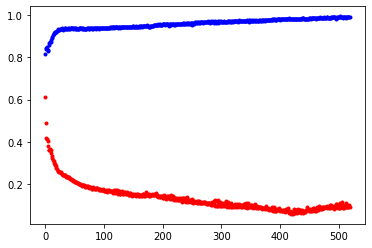

In [19]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()